In [15]:
import pandas as pd

from matplotlib import pyplot as plt

import os

In [17]:
dirname, case = "../ga/pypoptim/results", "210702_142714"

genes_best = pd.read_csv(os.path.join(dirname, case, "genes_best.csv"), index_col='g_name').iloc[:, -1]

In [18]:
genes_best

g_name
с_p      7.798575e-13
c_m      1.065427e-11
v_off    1.421120e+01
Name: 0, dtype: float64

In [19]:
phenotype = pd.read_csv(os.path.join(dirname, case, "phenotype", "phenotype_trace_1.csv"))

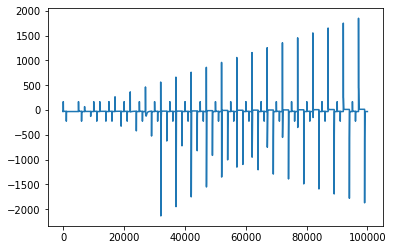

In [20]:
plt.plot(phenotype)